# KMeans Clustering Model

In [13]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [14]:
df = pd.read_csv("Grades.csv")
df

,Student name,Marks,Grade
0,ARAV SOOD,93,A
1,JOSHITA SHARMA,74,C
2,TANVEER SINGH SODHI,55,D
3,NIKHIL SHARMA,92,A
4,AKSHAY SOM,80,B
5,GAURAV SAHU,43,D
6,SAMSON SHUKLA,66,C
7,SUMIT THAKUR,47,D
8,MOHIT GARG,71,C
9,SATYAM KUMAR,95,A


Text(0, 0.5, 'Grade')

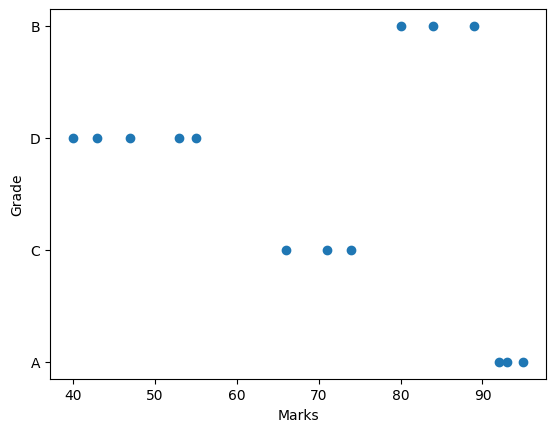

In [15]:
plt.scatter(df['Marks '], df['Grade'])
plt.xlabel('Marks')
plt.ylabel('Grade')

In [16]:
grade_mapping = {
    'A': 4,
    'B': 3,
    'C': 2,
    'D': 1,
}

df['Grade'] = df['Grade'].map(grade_mapping)


In [17]:
scaler = MinMaxScaler()

scaler.fit(df[['Grade']])
df['Grade'] = scaler.transform(df[['Grade']])

scaler.fit(df[['Marks ']])
df['Marks '] = scaler.transform(df[['Marks ']])

In [18]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Marks ','Grade']])
    sse.append(km.inertia_)

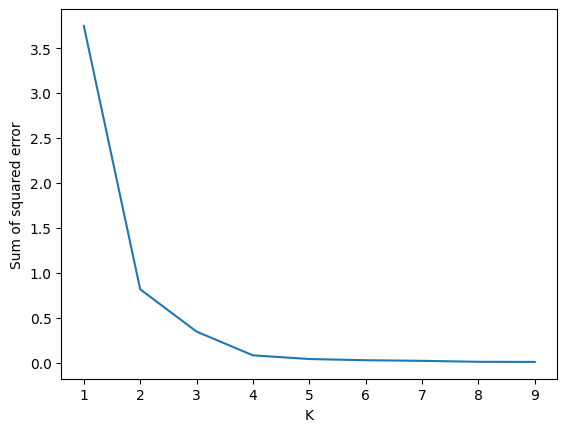

In [19]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [23]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Marks ','Grade']])
y_predicted

array([0, 2, 1, 0, 0, 1, 2, 1, 2, 0, 1, 0, 1, 0], dtype=int32)

In [24]:
df['cluster']=y_predicted
df.head()

,Student name,Marks,Grade,cluster
0,ARAV SOOD,0.963636,1.000000,0
1,JOSHITA SHARMA,0.618182,0.333333,2
2,TANVEER SINGH SODHI,0.272727,0.000000,1
3,NIKHIL SHARMA,0.945455,1.000000,0
4,AKSHAY SOM,0.727273,0.666667,0


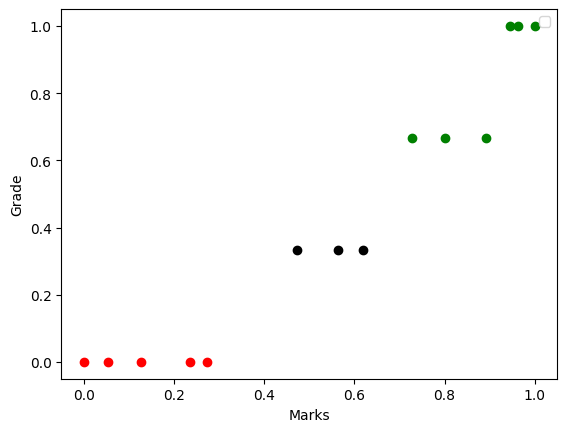

In [26]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['Marks '] ,df1['Grade'],color='green')
plt.scatter(df2['Marks '] ,df2['Grade'],color='red')
plt.scatter(df3['Marks '] ,df3['Grade'],color='black')
plt.xlabel('Marks')
plt.ylabel('Grade')
plt.legend()